In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils

Using Theano backend.
WARNING (theano.sandbox.cuda): CUDA is installed, but device gpu is not available  (error: Unable to get the number of gpus available: unknown error)


In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 100

## Load MNIST dataset

In [3]:
(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = mnist.load_data()

### Reshape Data from image matrix to array & normalize


In [4]:
X_train = X_train_raw.reshape(X_train_raw.shape[0], X_train_raw.shape[1]*X_train_raw.shape[2]).astype('float32')
X_train /= 255.

X_test = X_test_raw.reshape(X_test_raw.shape[0], X_test_raw.shape[1]*X_test_raw.shape[2]).astype('float32')
X_test /= 255.

In [5]:
Y_train = np_utils.to_categorical(Y_train_raw)

Y_test = np_utils.to_categorical(Y_test_raw)

## Multilayer Perceptron Model

In [6]:
model = Sequential()
model.add(Dense(output_dim=625, input_shape=(784,), init='normal', activation='sigmoid'))
model.add(Dense(output_dim=625, input_shape=(625,), init='normal', activation='sigmoid'))
model.add(Dense(output_dim=10, input_shape=(625,), init='normal', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 625)           490625      dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 625)           391250      dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 10)            6260        dense_2[0][0]                    
Total params: 888135
____________________________________________________________________________________________________


## Train

In [7]:
history = model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=batch_size, validation_split=0.15, verbose=0)

In [8]:
history.history

{'acc': [0.37596078433242497,
  0.74311764704947381,
  0.82894117644253895,
  0.85907843135384954,
  0.87494117647058822,
  0.88294117646123849,
  0.88980392155927768,
  0.89360784313725494,
  0.89717647056018601,
  0.90052941175535617,
  0.90268627449110439,
  0.90441176470588236,
  0.90654901962654266,
  0.90784313722685273,
  0.90919607840332328,
  0.90998039213816329,
  0.9114509803734574,
  0.91239215684404562,
  0.91323529412699678,
  0.91411764704947374,
  0.91494117649863749,
  0.91599999997195081,
  0.91639215685339537,
  0.91731372547149659,
  0.91829411761900959,
  0.91899999998130055,
  0.91970588233424166,
  0.92017647058823526,
  0.92135294114842137,
  0.92111764708687283,
  0.9223725490289576,
  0.9230196078244377,
  0.92345098038280715,
  0.92419607842202278,
  0.92452941179275516,
  0.92570588233424167,
  0.92613725491131049,
  0.92719607845007201,
  0.92739215687209486,
  0.92790196077496401,
  0.92860784316530409,
  0.92937254904765709,
  0.93003921569562431,
  0.930

## Evaluate

In [9]:
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s     
Summary: Loss over the test dataset: 0.15, Accuracy: 0.96


## Predict

In [10]:
test_predictions = model.predict(X_test)
test_prediction_ids = test_predictions.argmax(axis=1)

## Plot some predictions

In [11]:
from matplotlib import pyplot as plt
import numpy as np
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=6)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [91]:
n_view = 4

idx = np.random.permutation(range(0,len(X_test)))[:n_view]

imgs = X_test[idx,:].reshape(n_view, X_train_raw.shape[1], X_train_raw.shape[2])
titles = test_prediction_ids[idx]

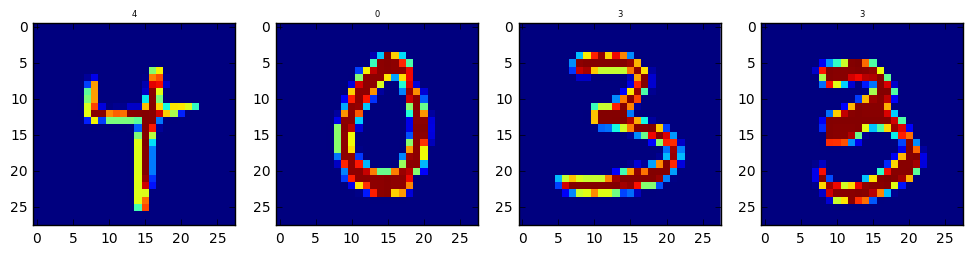

In [92]:
plots(imgs, titles=titles)
plt.show()

## Examine wrong predictions


In [80]:
# convert category vector into category label
Y_test_ids = Y_test.argmax(axis=1)

# compare the predicted and actual category labels to find error predictions
errors = np.array(Y_test_ids) - np.array(test_prediction_ids)

# gather all the wrong prediction indices
errors_idx = np.nonzero(errors)[0]

In [93]:
n_view = 4

random_idx = np.random.permutation(range(0,len(errors_idx)))[:n_view]

# grab a sampling of error indices 
random_errors_idx = errors_idx[random_idx]

# and prepare their images and labels
imgs = X_test[random_errors_idx,:].reshape(n_view, X_train_raw.shape[1], X_train_raw.shape[2])
titles = test_prediction_ids[random_errors_idx]

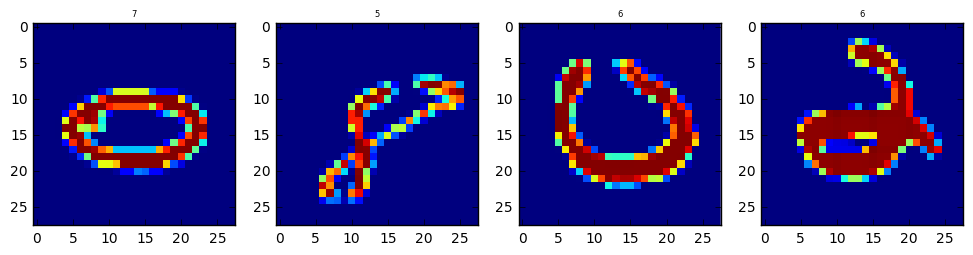

In [94]:
plots(imgs, titles=titles)
plt.show()